In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from fooof import FOOOF
from lagged_coherence import *

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 5 - 100 Hz                        
                                 Frequency Resolution is 0.30 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -26.5690, 1.3150                                         
                                                                                                  
                                       3 peaks were found:                                        
          

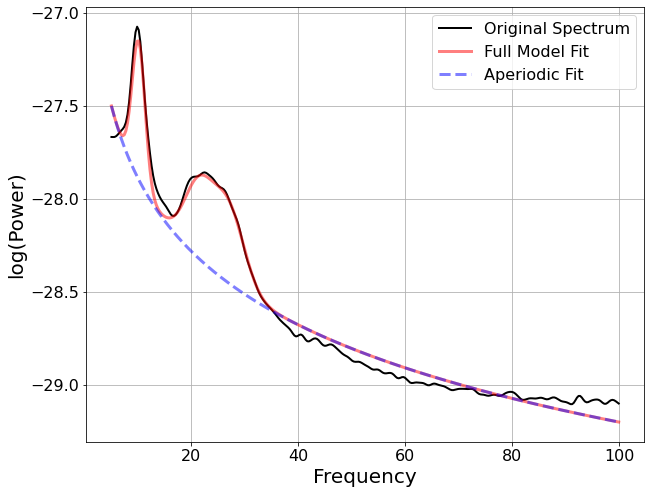

In [6]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,7,50)
subj_id='sub-102'
epoch='vis'

data=np.load('{}-{}-all-trials-subset_sensor-time.npy'.format(subj_id, epoch))
data=np.moveaxis(data,[0,1,2],[1,0,2])
data=data[8,:,:]
f,psd=scipy.signal.welch(data, fs=600, window='hann', 
                       nperseg=600, noverlap=300, nfft=2000, detrend='constant', 
                       return_onesided=True, scaling='density', axis=- 1, average='mean')
f_idx=(f>=freqs[0]) & (f<=freqs[-1])
f=f[f_idx]
psd=np.mean(psd[:,f_idx],axis=0)

fm=FOOOF()
fm.report(f,psd,[5,100])

In [7]:
lc_surrogate=lagged_surrogate_coherence(data, freqs, lags, 600)
lc_classic=lagged_coherence_classic(data, freqs, lags, 600)

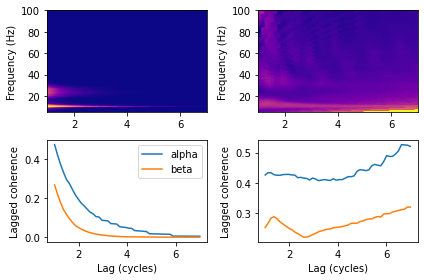

In [8]:
low_frange=np.where((freqs>=7) & (freqs<=13))[0]
high_frange=np.where((freqs>=13) & (freqs<=30))[0]

plt.figure()
plt.subplot(2,2,1)
i1=plt.imshow(np.nanmean(lc_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,2)
i1=plt.imshow(np.nanmean(lc_classic,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,3)
plt.plot(lags,np.nanmean(np.nanmean(lc_surrogate[:,low_frange,:],axis=1),axis=0),label='alpha')
plt.plot(lags,np.nanmean(np.nanmean(lc_surrogate[:,high_frange,:],axis=1),axis=0),label='beta')
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged coherence')
plt.legend()
plt.subplot(2,2,4)
plt.plot(lags,np.nanmean(np.nanmean(lc_classic[:,low_frange,:],axis=1),axis=0),label='alpha')
plt.plot(lags,np.nanmean(np.nanmean(lc_classic[:,high_frange,:],axis=1),axis=0),label='beta')
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged coherence')
plt.tight_layout()

In [9]:
lplv_surrogate=lagged_surrogate_coherence(data, freqs, lags, 600, type='plv')
lplv_classic=lagged_coherence_classic(data, freqs, lags, 600, type='plv')

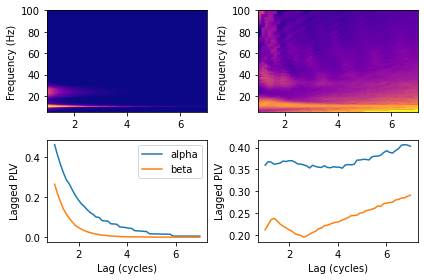

In [10]:
low_frange=np.where((freqs>=7) & (freqs<=13))[0]
high_frange=np.where((freqs>=13) & (freqs<=30))[0]

plt.figure()
plt.subplot(2,2,1)
i1=plt.imshow(np.nanmean(lplv_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,2)
i1=plt.imshow(np.nanmean(lplv_classic,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,3)
plt.plot(lags,np.nanmean(np.nanmean(lplv_surrogate[:,low_frange,:],axis=1),axis=0),label='alpha')
plt.plot(lags,np.nanmean(np.nanmean(lplv_surrogate[:,high_frange,:],axis=1),axis=0),label='beta')
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged PLV')
plt.legend()
plt.subplot(2,2,4)
plt.plot(lags,np.nanmean(np.nanmean(lplv_classic[:,low_frange,:],axis=1),axis=0),label='alpha')
plt.plot(lags,np.nanmean(np.nanmean(lplv_classic[:,high_frange,:],axis=1),axis=0),label='beta')
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged PLV')
plt.tight_layout()

In [11]:
lac_surrogate=lagged_surrogate_coherence(data, freqs, lags, 600, type='amp_coh')
lac_classic=lagged_coherence_classic(data, freqs, lags, 600, type='amp_coh')

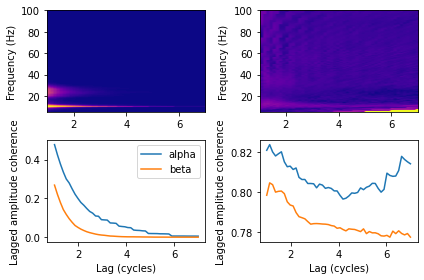

In [12]:
low_frange=np.where((freqs>=7) & (freqs<=13))[0]
high_frange=np.where((freqs>=13) & (freqs<=30))[0]

plt.figure()
plt.subplot(2,2,1)
i1=plt.imshow(np.nanmean(lac_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,2)
i1=plt.imshow(np.nanmean(lac_classic,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,3)
plt.plot(lags,np.nanmean(np.nanmean(lac_surrogate[:,low_frange,:],axis=1),axis=0),label='alpha')
plt.plot(lags,np.nanmean(np.nanmean(lac_surrogate[:,high_frange,:],axis=1),axis=0),label='beta')
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged amplitude coherence')
plt.legend()
plt.subplot(2,2,4)
plt.plot(lags,np.nanmean(np.nanmean(lac_classic[:,low_frange,:],axis=1),axis=0),label='alpha')
plt.plot(lags,np.nanmean(np.nanmean(lac_classic[:,high_frange,:],axis=1),axis=0),label='beta')
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged amplitude coherence')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(4,20))
for lag in range(1,8):
    plt.subplot(7,1,lag)
    lag_idx=np.argmin(np.abs(lags-lag))
    plt.plot(f,psd/np.max(psd),label='power')
    lc_norm=np.mean(lc_surrogate,axis=0)/np.max(np.mean(lc_surrogate,axis=0))
    plt.plot(freqs,lc_norm[:,lag_idx],label='new LC')
    lc_norm=lc_classic/np.max(lc_classic)
    plt.plot(freqs,lc_norm[:,lag_idx],label='LC classic')
    plt.legend()
    plt.xlabel('Frequency (Hz)')